IPython Notebooks
==================
* run code and move around
    * Shift-Enter: run cell, select below
    * Ctrl-Enter: run selected cells
    * Alt-Enter: run cell, insert below
* You can get help on a function or object by pressing ``[shift] + [tab]`` after the opening parenthesis ``function(``
* You can also get help by executing ``function?``

## Numpy Arrays

Manipulating `numpy` arrays is an important part of doing machine learning
(or, really, any type of scientific computation) in python.  This will likely
be review for most: we'll quickly go through some of the most important features.

In [43]:
import numpy as np

rng = np.random.RandomState(123)

# Generating a random array
X = rng.random_sample((3, 5))  # a 3 x 5 array

print(X)

[[ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897]
 [ 0.42310646  0.9807642   0.68482974  0.4809319   0.39211752]
 [ 0.34317802  0.72904971  0.43857224  0.0596779   0.39804426]]


In [10]:
# Accessing elements

# get a single element
print(X[0, 0])

# get a row
print(X[1])

# get a column
print(X[:, 1])


for i, x in enumerate(X):
    print(i, x)

0.696469185598
[ 0.42310646  0.9807642   0.68482974  0.4809319   0.39211752]
[ 0.28613933  0.9807642   0.72904971]
0 [ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897]
1 [ 0.42310646  0.9807642   0.68482974  0.4809319   0.39211752]
2 [ 0.34317802  0.72904971  0.43857224  0.0596779   0.39804426]


In [3]:
# Transposing an array
print(X.T)

[[ 0.4571252   0.25215877  0.69835681]
 [ 0.20403619  0.25770027  0.4001267 ]
 [ 0.81754077  0.03903944  0.28503513]
 [ 0.47101478  0.88986851  0.17764943]
 [ 0.20880329  0.5053389   0.3809204 ]]


In [4]:
# Turning a row vector into a column vector
y = np.linspace(0, 12, 5)
print(y.shape)
print(y)
print(y[:, np.newaxis])

(5,)
[  0.   3.   6.   9.  12.]
[[  0.]
 [  3.]
 [  6.]
 [  9.]
 [ 12.]]


In [5]:
# getting the shape or reshaping an array
print(X.shape)
print(X.reshape(5, 3))
print(X.reshape(5, -1))

(3, 5)
[[ 0.4571252   0.20403619  0.81754077]
 [ 0.47101478  0.20880329  0.25215877]
 [ 0.25770027  0.03903944  0.88986851]
 [ 0.5053389   0.69835681  0.4001267 ]
 [ 0.28503513  0.17764943  0.3809204 ]]
[[ 0.4571252   0.20403619  0.81754077]
 [ 0.47101478  0.20880329  0.25215877]
 [ 0.25770027  0.03903944  0.88986851]
 [ 0.5053389   0.69835681  0.4001267 ]
 [ 0.28503513  0.17764943  0.3809204 ]]


In [36]:
# indexing by an array of integers (fancy indexing)
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

[3 1 0]


array([[ 0.96369654,  0.00620969,  0.39299826],
       [ 0.78664329,  0.01572511,  0.01252491],
       [ 0.99888863,  0.55969713,  0.58735486]])

### vectorize

In [53]:
X = rng.random_sample((3000,200))

In [54]:
%timeit tmp = X.sum(axis=0)

1000 loops, best of 3: 276 µs per loop


In [55]:
%%timeit
res = 0.0
for x in X:
    res += x

1000 loops, best of 3: 1.55 ms per loop


In [15]:
# 1-d aggregation
X = np.arange(15).reshape((5,3))
print(X)
print(X.sum(axis=1))
print(X.sum(axis=0))
print(X.max())
print(X.max(axis=0))
print(X.argmax(axis=0))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[ 3 12 21 30 39]
[30 35 40]
14
[12 13 14]
[4 4 4]


There is much, much more to know, but these few operations are fundamental to what we'll
do during this tutorial.

## Scipy Sparse Matrices

We won't make very much use of these in this tutorial, but sparse matrices are very nice
in some situations.  In some machine learning tasks, especially those associated
with textual analysis, the data may be mostly zeros.  Storing all these zeros is very
inefficient, and representing in a way that only contains the "non-zero" values can be much more efficient.  We can create and manipulate sparse matrices as follows:

In [17]:
from scipy import sparse

# Create a random array with a lot of zeros
X = np.random.random((10, 5))
print(X)

[[ 0.55370708  0.21715552  0.33150996  0.43966793  0.00542661]
 [ 0.7645146   0.64953516  0.79401901  0.43758756  0.89275729]
 [ 0.78208687  0.29560567  0.73417669  0.87373075  0.36930987]
 [ 0.97847064  0.41243565  0.9985863   0.97593011  0.34090706]
 [ 0.48380361  0.37785418  0.02953418  0.88598118  0.76130731]
 [ 0.47732406  0.77442201  0.84447736  0.03650584  0.92430402]
 [ 0.47065596  0.02644754  0.79201975  0.81973377  0.22855779]
 [ 0.44048679  0.83967982  0.90328633  0.34219109  0.24025563]
 [ 0.55757037  0.46946416  0.95028451  0.3423309   0.71307126]
 [ 0.14228039  0.75732183  0.85469021  0.998135    0.86856926]]


In [18]:
# set the majority of elements to zero
X[X < 0.7] = 0
print(X)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.7645146   0.          0.79401901  0.          0.89275729]
 [ 0.78208687  0.          0.73417669  0.87373075  0.        ]
 [ 0.97847064  0.          0.9985863   0.97593011  0.        ]
 [ 0.          0.          0.          0.88598118  0.76130731]
 [ 0.          0.77442201  0.84447736  0.          0.92430402]
 [ 0.          0.          0.79201975  0.81973377  0.        ]
 [ 0.          0.83967982  0.90328633  0.          0.        ]
 [ 0.          0.          0.95028451  0.          0.71307126]
 [ 0.          0.75732183  0.85469021  0.998135    0.86856926]]


In [19]:
# turn X into a csr (Compressed-Sparse-Row) matrix
X_csr = sparse.csr_matrix(X)
print(X_csr)

  (1, 0)	0.76451460288
  (1, 2)	0.794019010578
  (1, 4)	0.89275729143
  (2, 0)	0.782086870202
  (2, 2)	0.73417669475
  (2, 3)	0.873730748804
  (3, 0)	0.978470637767
  (3, 2)	0.998586302167
  (3, 3)	0.975930113818
  (4, 3)	0.885981175572
  (4, 4)	0.761307314418
  (5, 1)	0.774422006048
  (5, 2)	0.844477364838
  (5, 4)	0.924304024607
  (6, 2)	0.792019752341
  (6, 3)	0.819733773615
  (7, 1)	0.839679815343
  (7, 2)	0.903286328915
  (8, 2)	0.950284512589
  (8, 4)	0.713071261608
  (9, 1)	0.757321826251
  (9, 2)	0.854690212293
  (9, 3)	0.998135002682
  (9, 4)	0.86856926256


In [20]:
# convert the sparse matrix to a dense array
print(X_csr.toarray())

[[ 0.          0.          0.          0.          0.        ]
 [ 0.7645146   0.          0.79401901  0.          0.89275729]
 [ 0.78208687  0.          0.73417669  0.87373075  0.        ]
 [ 0.97847064  0.          0.9985863   0.97593011  0.        ]
 [ 0.          0.          0.          0.88598118  0.76130731]
 [ 0.          0.77442201  0.84447736  0.          0.92430402]
 [ 0.          0.          0.79201975  0.81973377  0.        ]
 [ 0.          0.83967982  0.90328633  0.          0.        ]
 [ 0.          0.          0.95028451  0.          0.71307126]
 [ 0.          0.75732183  0.85469021  0.998135    0.86856926]]


The CSR representation can be very efficient for computations, but it is not
as good for adding elements.  For that, the LIL (List-In-List) representation
is better:

In [21]:
# Create an empty LIL matrix and add some items
X_lil = sparse.lil_matrix((5, 5))

for i, j in np.random.randint(0, 5, (15, 2)):
    X_lil[i, j] = i + j

print(X_lil)

  (0, 1)	1.0
  (1, 0)	1.0
  (1, 3)	4.0
  (2, 0)	2.0
  (2, 1)	3.0
  (2, 3)	5.0
  (3, 0)	3.0
  (3, 3)	6.0
  (4, 3)	7.0
  (4, 4)	8.0


In [22]:
print(X_lil.toarray())

[[ 0.  1.  0.  0.  0.]
 [ 1.  0.  0.  4.  0.]
 [ 2.  3.  0.  5.  0.]
 [ 3.  0.  0.  6.  0.]
 [ 0.  0.  0.  7.  8.]]


Often, once an LIL matrix is created, it is useful to convert it to a CSR format
(many scikit-learn algorithms require CSR or CSC format)

In [23]:
print(X_lil.tocsr())

  (0, 1)	1.0
  (1, 0)	1.0
  (1, 3)	4.0
  (2, 0)	2.0
  (2, 1)	3.0
  (2, 3)	5.0
  (3, 0)	3.0
  (3, 3)	6.0
  (4, 3)	7.0
  (4, 4)	8.0


In [41]:
# convert matrix to array
np.array(X_csr.sum(axis=0)).ravel()

array([ 2.52507211,  2.37142365,  6.87154018,  4.55351081,  4.16000915])

In [35]:
? sparse.csr_matrix

The available sparse formats that can be useful for various problems:

- `CSR` (compressed sparse row)
- `CSC` (compressed sparse column)
- `BSR` (block sparse row)
- `COO` (coordinate)
- `DIA` (diagonal)
- `DOK` (dictionary of keys)
- `LIL` (list in list)

The ``scipy.sparse`` submodule also has a lot of functions for sparse matrices
including linear algebra, sparse solvers, graph algorithms, and much more.

## Matplotlib

Another important part of machine learning is visualization of data.  The most common
tool for this in Python is `matplotlib`.  It is an extremely flexible package, but
we will go over some basics here.

First, something special to IPython notebook.  We can turn on the "IPython inline" mode,
which will make plots show up inline in the notebook.

In [24]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt

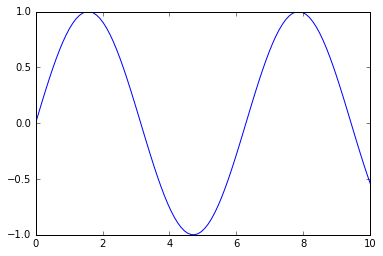

In [26]:
# plotting a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

In [81]:
import seaborn
seaborn.set()

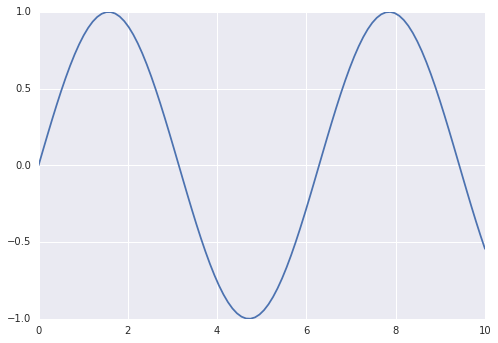

In [90]:
# plotting a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

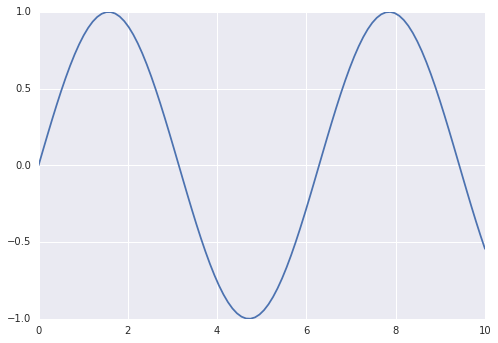

In [91]:
import mpld3
mpld3.enable_notebook()
plt.plot(x, np.sin(x))

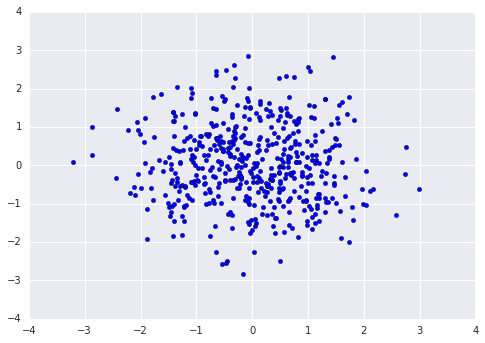

In [66]:
# scatter-plot points
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y)

In [85]:
# showing images
x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)

(100, 100)


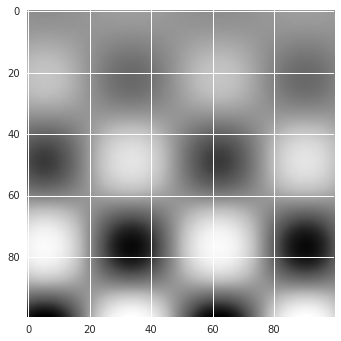

In [86]:
# imshow - note that origin is at the top-left by default!
plt.imshow(im)

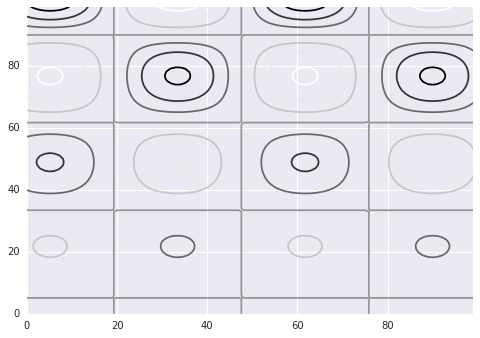

In [87]:
# Contour plot - note that origin here is at the bottom-left by default!
plt.contour(im)

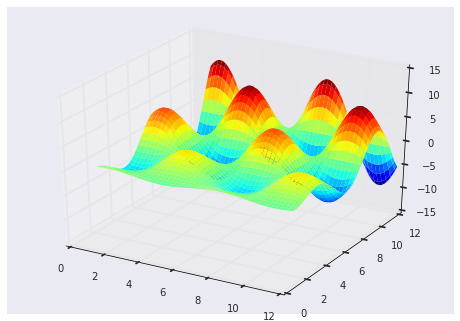

In [88]:
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.jet, cstride=2, rstride=2, linewidth=0)

There are many, many more plot types available.  One useful way to explore these is by
looking at the matplotlib gallery: http://matplotlib.org/gallery.html

You can test these examples out easily in the notebook: simply copy the ``Source Code``
link on each page, and put it in a notebook using the ``%load`` magic.
For example:

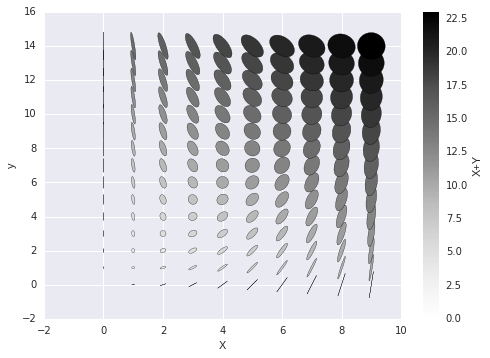

In [80]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.hstack((X.ravel()[:,np.newaxis], Y.ravel()[:,np.newaxis]))

ww = X/10.0
hh = Y/15.0
aa = X*9

fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       transOffset=ax.transData)
ec.set_array((X+Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()